In [2]:
!kaggle datasets list -s "Covid-19"

ref                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
imdevskp/corona-virus-report                       COVID-19 Dataset                                     19MB  2020-08-07 03:47:47         185654       1565  1.0              
allen-institute-for-ai/CORD-19-research-challenge  COVID-19 Open Research Dataset Challenge (CORD-19)   14GB  2022-02-02 21:02:08         140353       9803  0.88235295       
sudalairajkumar/covid19-in-india                   COVID-19 in India                                   758KB  2021-08-11 04:14:10         150289       1756  0.9117647        
gpreda/covid-world-vaccination-progress            COVID-19 World Vaccination Progress                   2MB  2022-03-08 14:2

In [3]:
!kaggle datasets download imdevskp/corona-virus-report


  0%|          | 0.00/19.0M [00:00<?, ?B/s]
  5%|5         | 1.00M/19.0M [00:01<00:18, 998kB/s]
 11%|#         | 2.00M/19.0M [00:02<00:25, 702kB/s]
 16%|#5        | 3.00M/19.0M [00:03<00:20, 816kB/s]
 21%|##1       | 4.00M/19.0M [00:04<00:16, 973kB/s]
 26%|##6       | 5.00M/19.0M [00:05<00:13, 1.09MB/s]
 32%|###1      | 6.00M/19.0M [00:06<00:11, 1.17MB/s]
 37%|###6      | 7.00M/19.0M [00:06<00:10, 1.23MB/s]
 42%|####2     | 8.00M/19.0M [00:07<00:09, 1.20MB/s]
 47%|####7     | 9.00M/19.0M [00:08<00:08, 1.17MB/s]
 53%|#####2    | 10.0M/19.0M [00:09<00:07, 1.23MB/s]
 58%|#####7    | 11.0M/19.0M [00:10<00:06, 1.25MB/s]
 63%|######3   | 12.0M/19.0M [00:11<00:05, 1.28MB/s]
 68%|######8   | 13.0M/19.0M [00:11<00:04, 1.32MB/s]
 74%|#######3  | 14.0M/19.0M [00:12<00:03, 1.34MB/s]
 79%|#######8  | 15.0M/19.0M [00:13<00:03, 1.36MB/s]
 84%|########4 | 16.0M/19.0M [00:14<00:02, 1.30MB/s]
 89%|########9 | 17.0M/19.0M [00:15<00:01, 1.24MB/s]
 95%|#########4| 18.0M/19.0M [00:15<00:00, 1.29MB/s]
100%|

In [12]:
import pandas as pd
import numpy as np

In [18]:
path = "covid_19_clean_complete.csv"
df = pd.read_csv(path)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [20]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [25]:
df.fillna(0)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,0,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,0,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,0,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,0,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,0,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,0,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,0,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,0,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [28]:
print(df.dtypes)

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object


In [21]:
df.fillna(0)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,0,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,0,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,0,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,0,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,0,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,0,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,0,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,0,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [29]:
df.info

<bound method DataFrame.info of       Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27

In [23]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [30]:
df.fillna(0)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,0,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,0,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,0,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,0,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,0,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,0,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,0,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,0,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [24]:
df.fillna(0)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,0,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,0,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,0,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,0,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,0,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,0,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,0,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,0,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [26]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [31]:
df.describe(include='all')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
count,14664,49068,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068
unique,78,187,NaN,NaN,188,NaN,NaN,NaN,NaN,6
top,Australian Capital Territory,China,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,Europe
freq,188,6204,NaN,NaN,261,NaN,NaN,NaN,NaN,15040
mean,NaN,NaN,21.433730,23.528236,NaN,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,NaN
std,NaN,NaN,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,NaN
min,NaN,NaN,-51.796300,-135.000000,NaN,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,NaN
25%,NaN,NaN,7.873054,-15.310100,NaN,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,23.634500,21.745300,NaN,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,NaN
75%,NaN,NaN,41.204380,80.771797,NaN,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,NaN


In [33]:
df.fillna(0)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,0,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,0,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,0,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,0,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,0,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,0,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,0,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,0,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [35]:
df['Lat'] = df['Lat'].fillna(0)
df['Long'] = df['Long'].fillna(0)
df['Date'] = df['Date'].fillna(0)
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Deaths'] = df['Deaths'].fillna(0)
df['Recovered'] = df['Recovered'].fillna(0)
df['Active'] = df['Active'].fillna(0)
df['WHO Region'] = df['WHO Region'].fillna(0)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [58]:
df.fillna('-')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,-,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,-,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,-,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,-,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,-,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,-,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,-,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,-,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,-,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [37]:
df.describe(include='all')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
count,14664,49068,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068
unique,78,187,NaN,NaN,188,NaN,NaN,NaN,NaN,6
top,Australian Capital Territory,China,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,Europe
freq,188,6204,NaN,NaN,261,NaN,NaN,NaN,NaN,15040
mean,NaN,NaN,21.433730,23.528236,NaN,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,NaN
std,NaN,NaN,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,NaN
min,NaN,NaN,-51.796300,-135.000000,NaN,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,NaN
25%,NaN,NaN,7.873054,-15.310100,NaN,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,23.634500,21.745300,NaN,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,NaN
75%,NaN,NaN,41.204380,80.771797,NaN,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,NaN


In [59]:
df.fillna('-')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,-,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,-,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,-,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,-,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,-,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,-,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,-,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,-,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,-,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [38]:
df.corr()

,Lat,Long,Confirmed,Deaths,Recovered,Active
Lat,1.000000,-0.127259,0.036665,0.070040,0.015329,0.044392
Long,-0.127259,1.000000,-0.078911,-0.101340,-0.052391,-0.085688
Confirmed,0.036665,-0.078911,1.000000,0.912361,0.895506,0.950255
Deaths,0.070040,-0.101340,0.912361,1.000000,0.763090,0.891858
Recovered,0.015329,-0.052391,0.895506,0.763090,1.000000,0.713088
Active,0.044392,-0.085688,0.950255,0.891858,0.713088,1.000000


Matplotlib is building the font cache; this may take a moment.


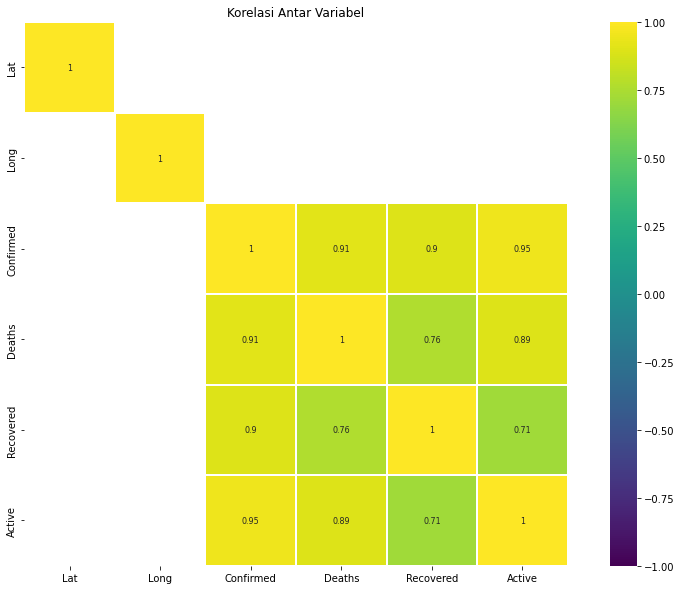

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

korelasi = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(korelasi[(korelasi >= 0.5) | (korelasi <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, 
            annot=True, annot_kws={"size": 8}, square=True).set_title('Korelasi Antar Variabel')
plt.show()

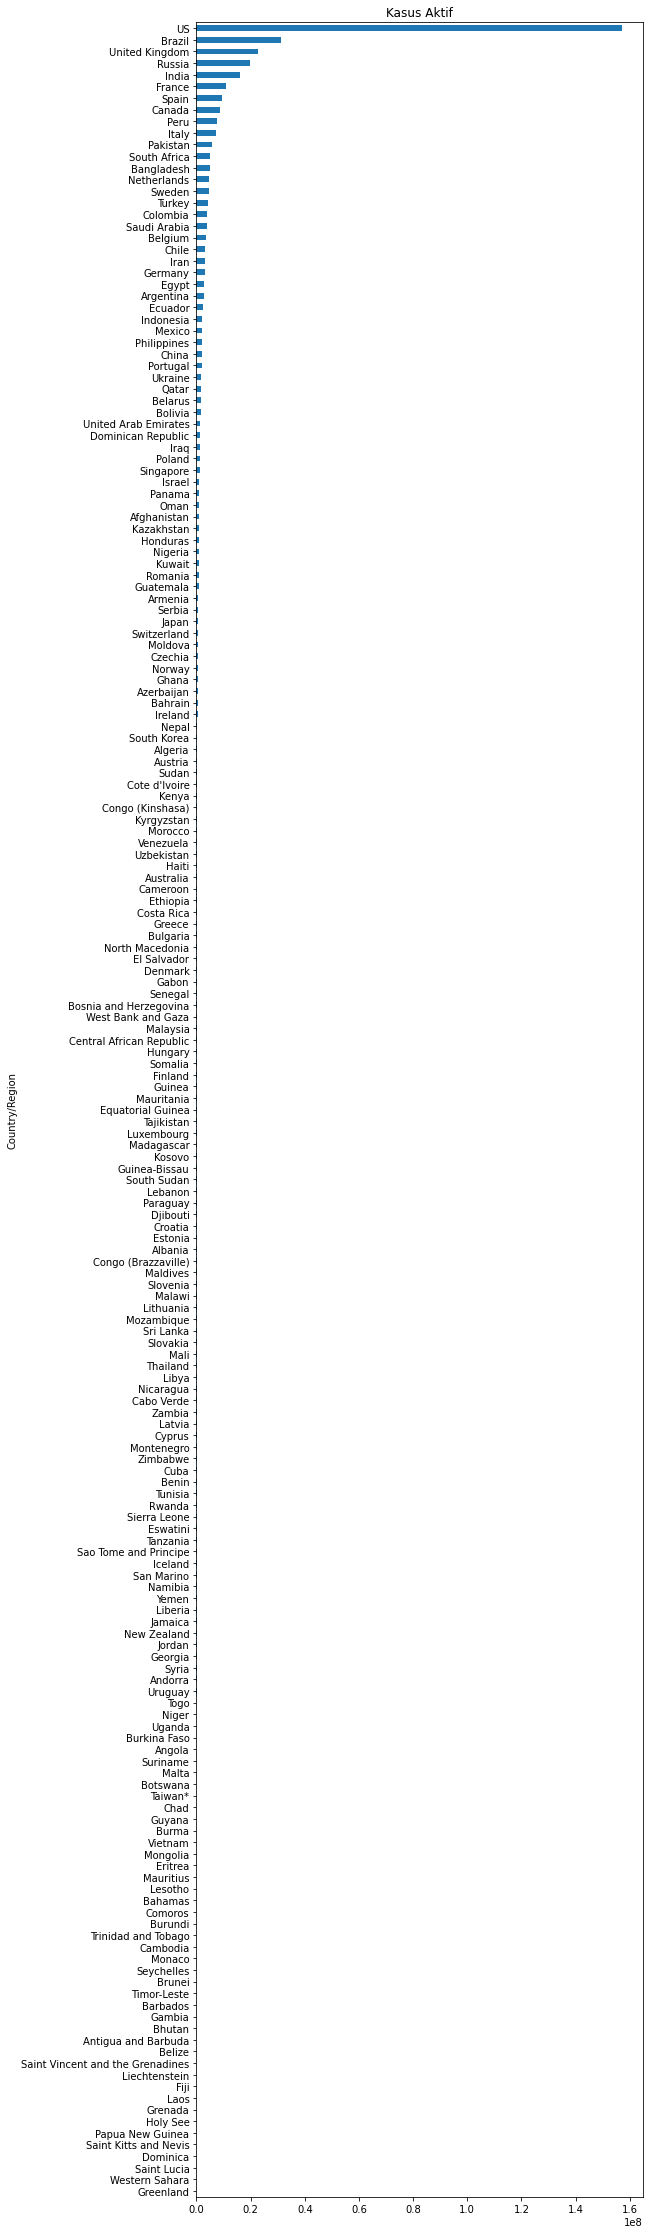

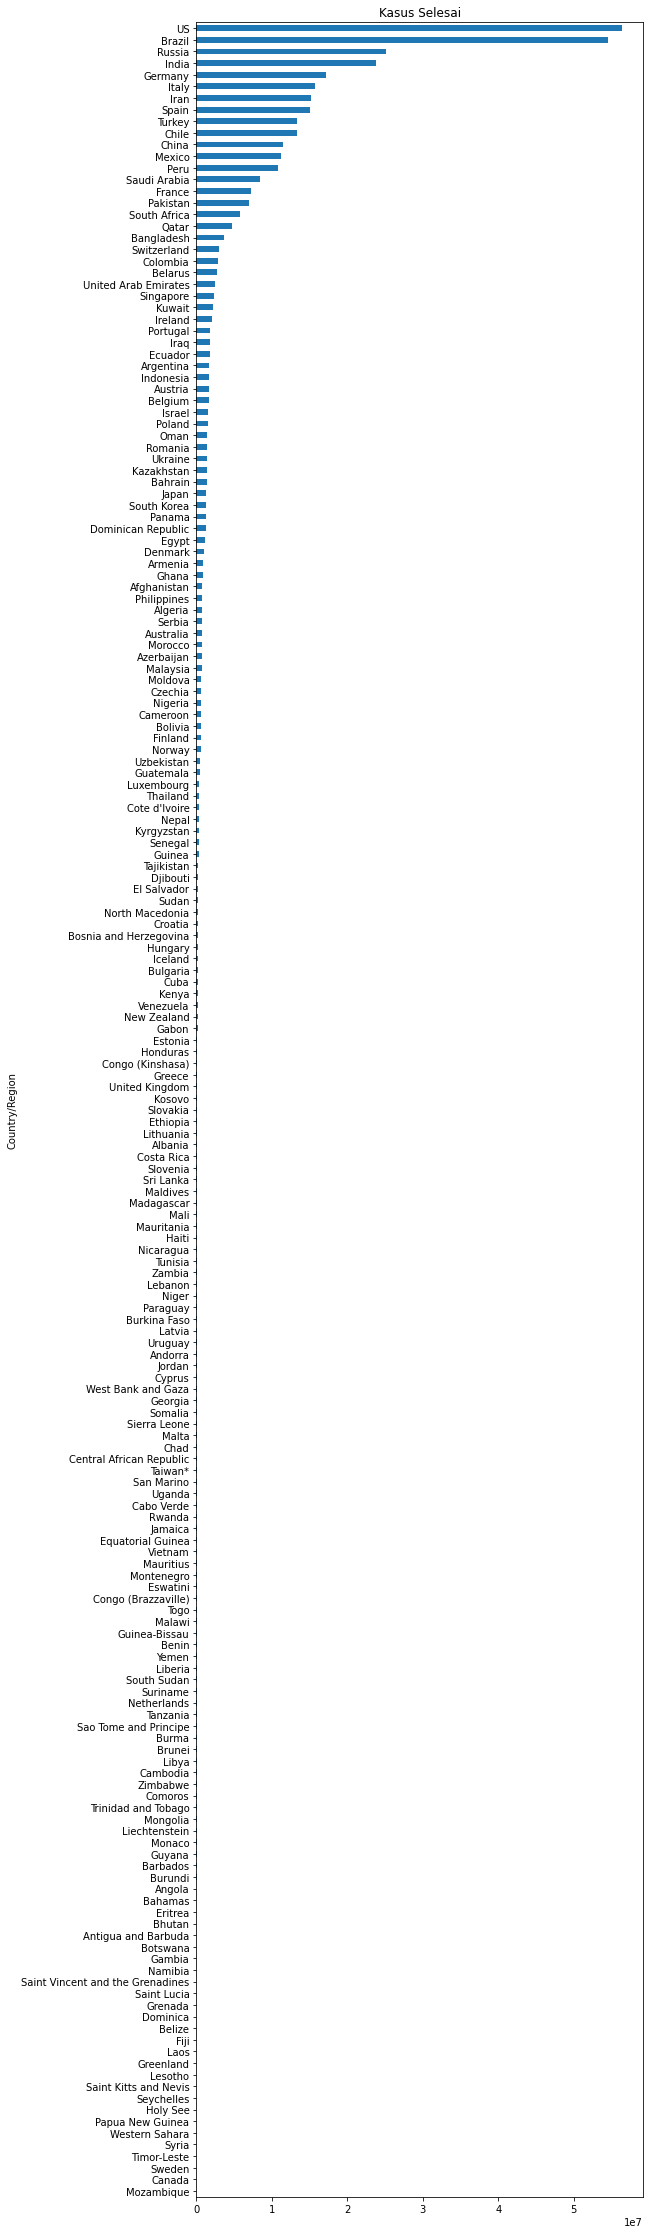

In [44]:
vac_total = df.groupby("Country/Region")["Active"].sum().sort_values()
vac_total.plot(kind="barh", fontsize=10, figsize=(8,40), title='Kasus Aktif')
plt.show()

people_total = df.groupby("Country/Region")["Recovered"].sum().sort_values()
people_total.plot(kind="barh", fontsize=10, figsize=(8,40), title='Kasus Selesai')
plt.show()

C:\Users\Edr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Active'>

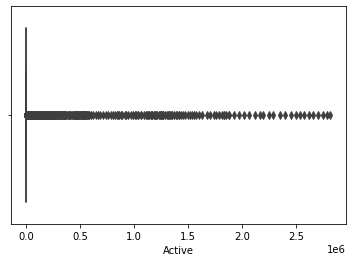

In [45]:
sns.boxplot(df['Active'])

C:\Users\Edr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recovered'>

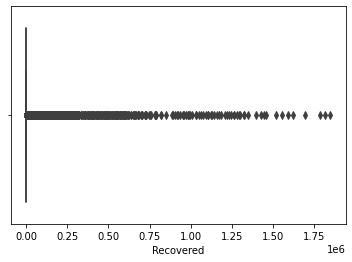

In [46]:
sns.boxplot(df['Recovered'])

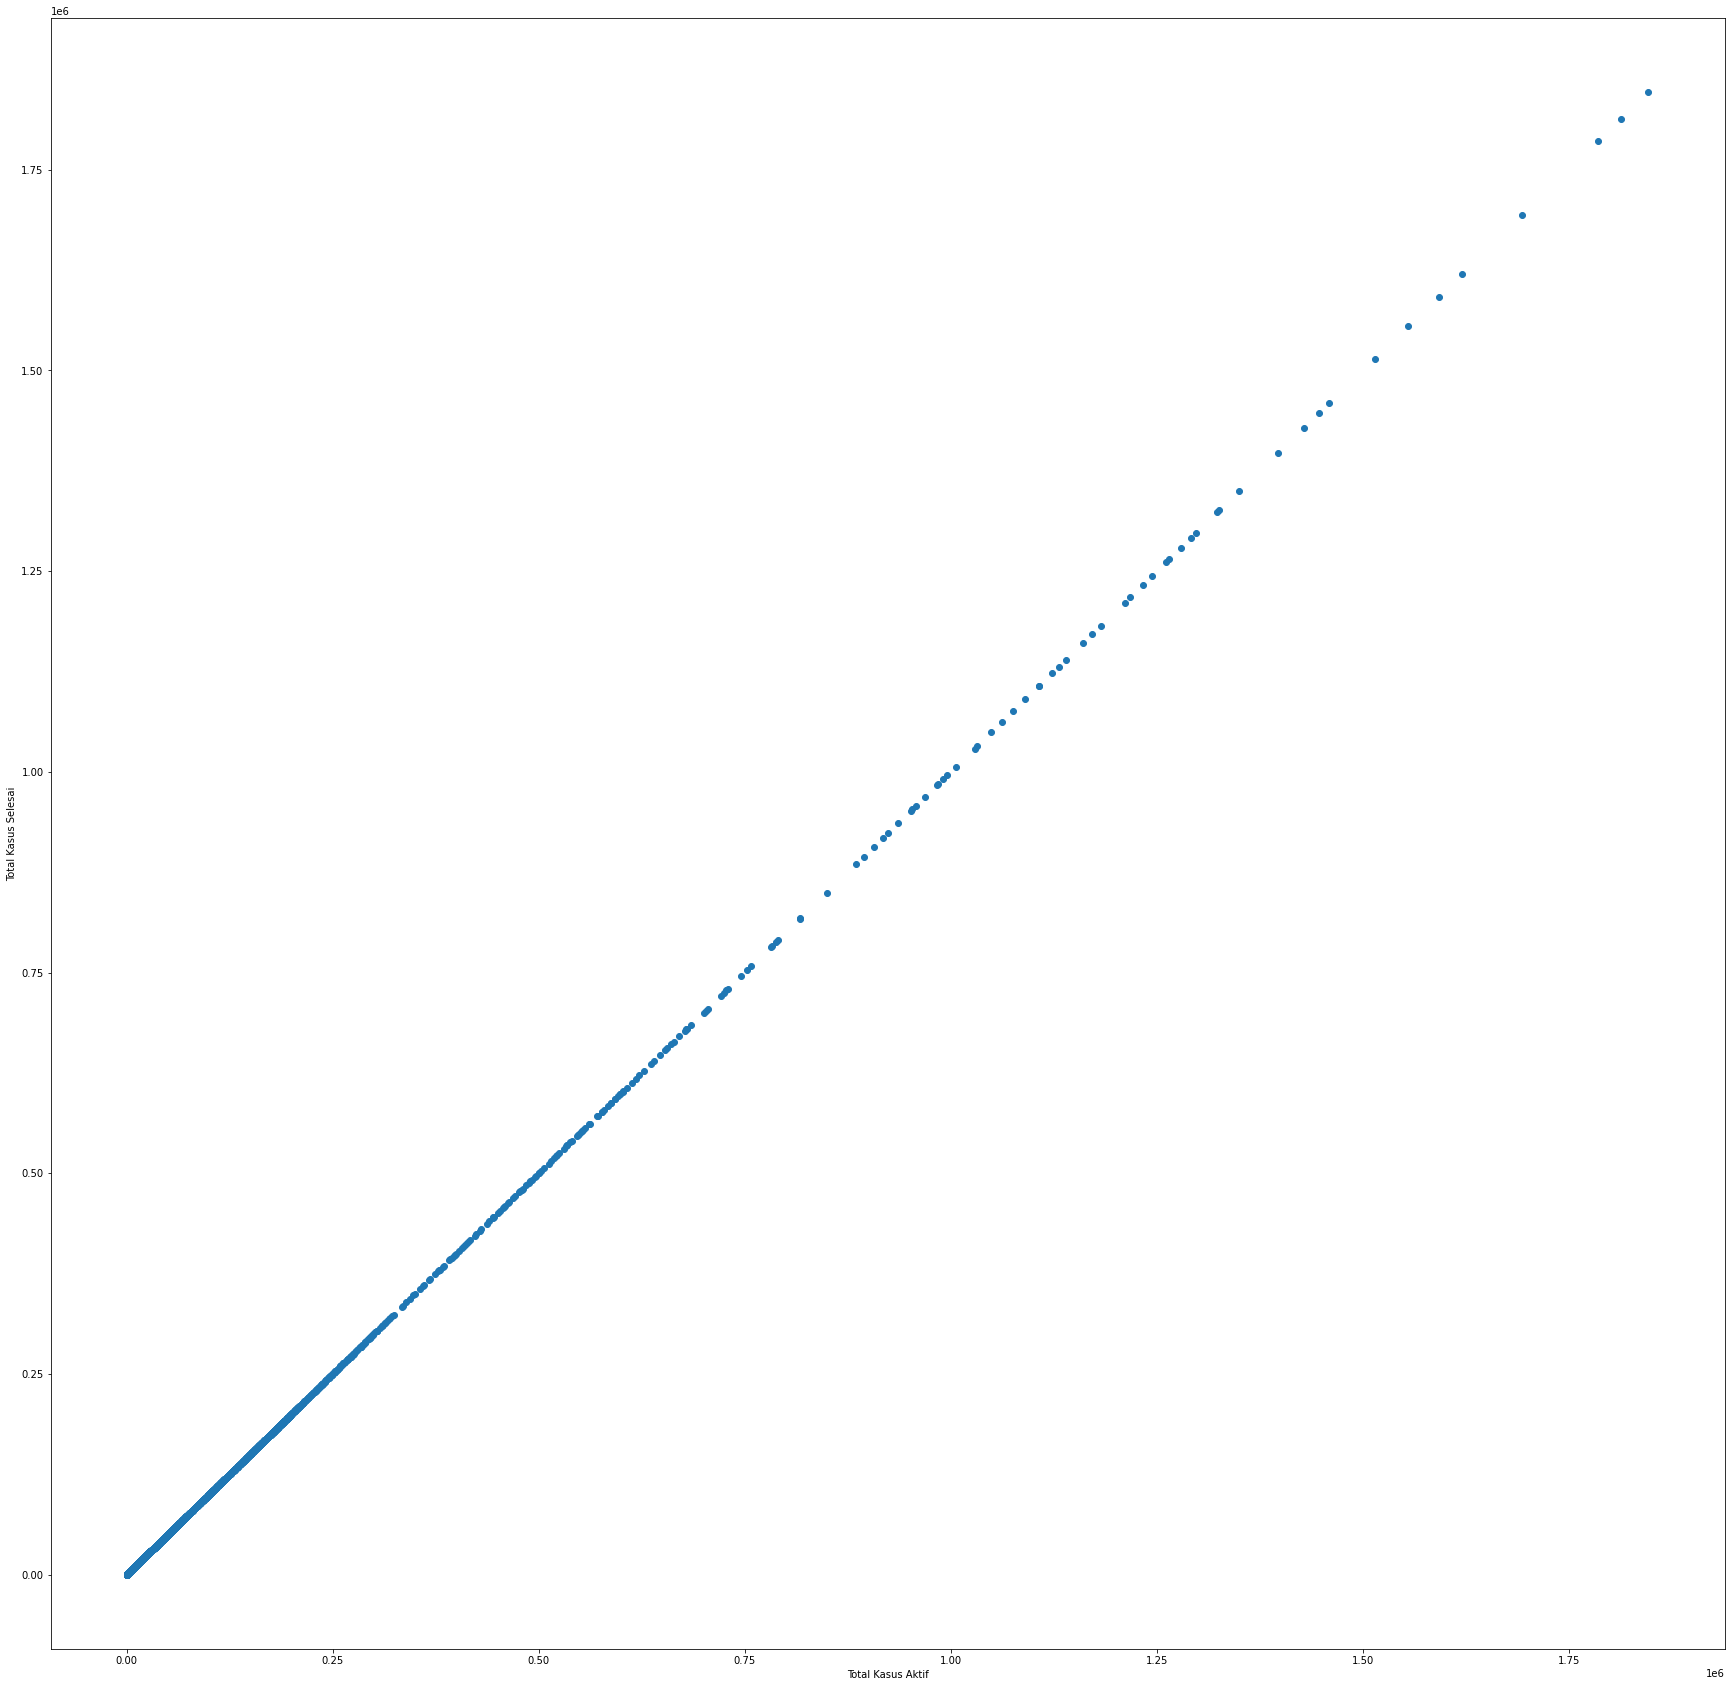

In [47]:
# Scatter plot
fig, ax = plt.subplots(figsize = (30,30))
ax.scatter(df['Recovered'], df['Recovered'])

# x-axis label
ax.set_xlabel('Total Kasus Aktif')
 
# y-axis label
ax.set_ylabel('Total Kasus Selesai')
plt.show()

In [48]:
!pip install Sastrawi

In [2]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 460.8 kB/s eta 0:00:00
     ------------------------------------ 274.4/274.4 KB 675.6 kB/s eta 0:00:00
     -------------------------------------- 97.5/97.5 KB 618.8 kB/s eta 0:00:00


In [3]:
import nltk #import library nltk
from nltk.tokenize import word_tokenize #import word_tokenize for tokenizing text into words 
from nltk.tokenize import sent_tokenize #import sent_tokenize for tokenizing paragraph into sentences
from nltk.stem.porter import PorterStemmer #import Porter Stemmer Algorithm 
from nltk.stem import WordNetLemmatizer #import WordNet lemmatizer 
from nltk.corpus import stopwords #import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #import Indonesian Stemmer
import re #import regular expression
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [12]:
#casefolding
def casefolding(s):
    new_str = s.lower()
    
    return new_str

text_data = "Saya suka belajar ngoding. Karena ingin menjadi pintar dan menjadi programmer. Selain itu, saya ingin membuat bahagia kedua orang tua agar menjadi anak yang berbakti."
casefolding(text_data)

'saya suka belajar ngoding. karena ingin menjadi pintar dan menjadi programmer. selain itu, saya ingin membuat bahagia kedua orang tua agar menjadi anak yang berbakti.'

In [9]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package 

[nltk_data]    |   Unzipping misc\mwa_ppdb.zip.
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\names.zip.
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\omw.zip.
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\omw-1.4.zip.
[nltk_data]    |

KeyboardInterrupt: 

In [13]:
sent_tokenize(casefolding(text_data))

['saya suka belajar ngoding.',
 'karena ingin menjadi pintar dan menjadi programmer.',
 'selain itu, saya ingin membuat bahagia kedua orang tua agar menjadi anak yang berbakti.']

In [14]:
def stemmingIndo(str):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(str)

stemmingIndo(text_data)

'saya suka ajar ngoding karena ingin jadi pintar dan jadi programmer selain itu saya ingin buat bahagia dua orang tua agar jadi anak yang bakti'

In [15]:
def word_tokenization(s):
    tokens = word_tokenize(s)

    return tokens
    
word_tokenization(text_data)

['Saya',
 'suka',
 'belajar',
 'ngoding',
 '.',
 'Karena',
 'ingin',
 'menjadi',
 'pintar',
 'dan',
 'menjadi',
 'programmer',
 '.',
 'Selain',
 'itu',
 ',',
 'saya',
 'ingin',
 'membuat',
 'bahagia',
 'kedua',
 'orang',
 'tua',
 'agar',
 'menjadi',
 'anak',
 'yang',
 'berbakti',
 '.']

In [16]:
word_tokenization(stemmingIndo(text_data))

['saya',
 'suka',
 'ajar',
 'ngoding',
 'karena',
 'ingin',
 'jadi',
 'pintar',
 'dan',
 'jadi',
 'programmer',
 'selain',
 'itu',
 'saya',
 'ingin',
 'buat',
 'bahagia',
 'dua',
 'orang',
 'tua',
 'agar',
 'jadi',
 'anak',
 'yang',
 'bakti']

In [17]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
stopword.remove(text_data)

'Saya suka belajar ngoding. Karena menjadi pintar menjadi programmer. Selain itu, ingin membuat bahagia kedua orang tua menjadi anak berbakti.'

In [19]:
def stemmingEnglish(str):
    porter_stemmer = PorterStemmer()
    words = word_tokenize(str)
    result = list()
    for word in words:
        result.append(porter_stemmer.stem(word))
        
    return ' '.join(result)

text_data = "She so pretty like my mom, and that my reason to love her anyway"
stemmingEnglish(text_data)

'she so pretti like my mom , and that my reason to love her anyway'

In [20]:
porter_stemmer = PorterStemmer()

word_data = "It originated from the idea that there are readers who prefer learning new skills from the comforts of their drawing rooms"
# First Word tokenization
nltk_tokens = nltk.word_tokenize(word_data)
#Next find the roots of the word
for w in nltk_tokens:
       print("Actual: %s  Stem: %s"  % (w,porter_stemmer.stem(w)))

Actual: It  Stem: it
Actual: originated  Stem: origin
Actual: from  Stem: from
Actual: the  Stem: the
Actual: idea  Stem: idea
Actual: that  Stem: that
Actual: there  Stem: there
Actual: are  Stem: are
Actual: readers  Stem: reader
Actual: who  Stem: who
Actual: prefer  Stem: prefer
Actual: learning  Stem: learn
Actual: new  Stem: new
Actual: skills  Stem: skill
Actual: from  Stem: from
Actual: the  Stem: the
Actual: comforts  Stem: comfort
Actual: of  Stem: of
Actual: their  Stem: their
Actual: drawing  Stem: draw
Actual: rooms  Stem: room


In [21]:
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

word_data = "It originated from the idea that there are readers who prefer learning new skills from the comforts of their drawing rooms"
nltk_tokens = nltk.word_tokenize(word_data)
for w in nltk_tokens:
       print ("Actual: %s  Lemma: %s"  % (w,wordnet_lemmatizer.lemmatize(w)))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


Actual: It  Lemma: It
Actual: originated  Lemma: originated
Actual: from  Lemma: from
Actual: the  Lemma: the
Actual: idea  Lemma: idea
Actual: that  Lemma: that
Actual: there  Lemma: there
Actual: are  Lemma: are
Actual: readers  Lemma: reader
Actual: who  Lemma: who
Actual: prefer  Lemma: prefer
Actual: learning  Lemma: learning
Actual: new  Lemma: new
Actual: skills  Lemma: skill
Actual: from  Lemma: from
Actual: the  Lemma: the
Actual: comforts  Lemma: comfort
Actual: of  Lemma: of
Actual: their  Lemma: their
Actual: drawing  Lemma: drawing
Actual: rooms  Lemma: room


In [22]:
def removeDigit(str):
    new_string =  re.sub(r"[0-9]", " ", str)
    return new_string

text_data = "Saya lahir tanggal 26 Mei 1989"
removeDigit(text_data)

'Saya lahir tanggal    Mei     '

In [25]:
def removeDigit(int):
    new_string =  re.sub(r"[0-9]", " ", int)
    return new_string

text_data = "Saya lahir tanggal 26 Mei 1989"
removeDigit(text_data)

'Saya lahir tanggal    Mei     '

In [26]:
nltk.download('averaged_perceptron_tagger')
def postag(str):
    tok_sentence = nltk.word_tokenize(str)
    tagged_sentence = nltk.pos_tag(tok_sentence)
    return tagged_sentence

text_data = "It originated from the idea that there are readers who prefer learning new skills from the comforts of their drawing rooms"
postag(text_data)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Edr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('It', 'PRP'),
 ('originated', 'VBD'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('idea', 'NN'),
 ('that', 'IN'),
 ('there', 'EX'),
 ('are', 'VBP'),
 ('readers', 'NNS'),
 ('who', 'WP'),
 ('prefer', 'VBP'),
 ('learning', 'VBG'),
 ('new', 'JJ'),
 ('skills', 'NNS'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('comforts', 'NNS'),
 ('of', 'IN'),
 ('their', 'PRP$'),
 ('drawing', 'NN'),
 ('rooms', 'NNS')]

In [29]:
import re, string, unicodedata

def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
    
    return str

str = "Copyright © 2008 John Wiley & Sons, Ltd. adalah ini https://www.analyticsvidhya.com/blog/2015/10/6-practices-enhance-performance-text-classification-model/"
print(cleaning(str))

copyright john wiley sons ltd adalah ini


In [30]:
text= open("IndonesiaTangguhLawanCovid.txt","r", encoding='utf-8')

txt = text.read()

In [31]:
clean_txt = cleaning(txt)

In [32]:
stop = stopword.remove(clean_txt)
print(stop)

pertimbangkan melakukan hal berikut apa yg terjadi india terjadi indonesia tercinta perusahaan perkantoran pabrik memaksimalkan wfh kala kasus harian naik terus sebagian tetap wfo perketat prokes khususnya terkait upgrade masker memaksimalkan ventilasi pelarangan makan bersama nyawa karyawan minimal kesehatan jangka panjang ada tangan para manajer direktur lindungi aset paling berharga bisnis covid long covid batalkan rencana pembelajaran tatap muka ptm nasional wabah dianggap terkendali kalaupun kebijakan ptm dibatalkan jangan kirim anak turut kecuali yakin prokes ditegakkan mitigasi disiapkan ada kasus positif lingkungan sekolah tentunya siap segala konsekuensi pilihan covid anak berbahaya menyebabkan long covid walaupun otg telah dinyatakan sembuh segera buka vaksinasi seluas luasnya semudah mudahnya usia tahun atas prioritaskan dosis pertama sebanyak banyaknya orang menggunakan vaksin astrazeneca yg terbukti lebih efektif mencegah rawat inap rs hapuskan syarat surat domisili cukup 

In [34]:
import sys
print(sys.executable)

C:\Users\Edr\AppData\Local\Programs\Python\Python310\python.exe


In [46]:
!pip install some_package

In [56]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [20 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.10\wordcloud
  UPDATING build\lib.win-amd64-3.10\wordcloud/_version


  Running setup.py clean for wordcloud
Failed to build wordcloud
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Failed building wheel for wordcloud
  error: subprocess-exited-with-error
  
  Running setup.py install for wordcloud did not run successfully.
  exit code: 1
  
  [20 lines of output]
  running install
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.10\wordcloud
  

In [57]:
words_in_article = stop.split()

In [58]:
import collections
import itertools

# Create counter
counts_no_urls = collections.Counter(words_in_article)

counts_no_urls.most_common(15)

[('masker', 15),
 ('yg', 9),
 ('covid', 8),
 ('prokes', 6),
 ('lebih', 6),
 ('rumah', 5),
 ('memaksimalkan', 4),
 ('makan', 4),
 ('bersama', 4),
 ('minimal', 4),
 ('ruangan', 4),
 ('keluarga', 4),
 ('luar', 4),
 ('hindari', 4),
 ('kalau', 4)]

In [60]:
import pandas as pd

df_txt = pd.DataFrame(counts_no_urls.most_common(15), columns=['words', 'count'])
df_txt.head()

,words,count
0,masker,15
1,yg,9
2,covid,8
3,prokes,6
4,lebih,6


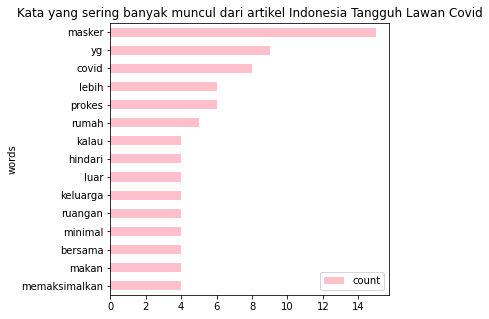

In [63]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(5, 5))

# Plot horizontal bar graph
df_txt.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="pink")

ax.set_title("Kata yang sering banyak muncul dari artikel Indonesia Tangguh Lawan Covid")

plt.show() 

In [62]:
import json
import os

with open('contoh_json.jsonl', 'r', encoding='utf-8', errors='ignore') as json_file:
    json_list = list(json_file)

    i=0
for json_str in json_list:
    i += 1
    result = json.loads(json_str)
    text = format(result['summary']).replace('\s+','')
    clean_text = cleaning(text)
    stop_text = stopword.remove(clean_text)
    stem_text = stemmingIndo(stop_text)
    
    print("Teks Ke-",i)
    print("Teks JSON:", text)
    print("Teks Bersih:", clean_text)
    print("Teks tanpa stopwords:", stop_text)
    print("Teks setelah stemming:", stem_text)
    print()

Teks Ke- 1
Teks JSON: [['Eman', 'Ahmed', 'Abd', 'El', 'Aty', 'memiliki', 'berat', 'badan', 'mencapai', '500', 'kilogram', 'sebelum', 'menjalankan', 'operasi', 'di', 'Mumbai', 'Maret', 'lalu', 'dimana', 'ia', 'mengurangi', 'seperlima', 'dari', 'berat', 'badannya', '.'], ['Abd', 'El', 'Aty', 'diberi', 'diet', 'cairan', 'khusus', 'selama', 'berada', 'di', 'India', 'yang', 'bertujuan', 'menurunkan', 'berat', 'badan', '.'], ['Kini', ',', 'berat', 'badannya', 'telah', 'turun', 'drastis', 'sebanyak', '323', 'kilogram', 'dalam', 'tiga', 'bulan', '.'], ['Sekarang', 'berat', 'badannya', 'tinggal', '176,6', 'kilogram', '.']]
Teks Bersih: eman ahmed abd el aty memiliki berat badan mencapai kilogram sebelum menjalankan operasi di mumbai maret lalu dimana ia mengurangi seperlima dari berat badannya abd el aty diberi diet cairan khusus selama berada di india yang bertujuan menurunkan berat badan kini berat badannya telah turun drastis sebanyak kilogram dalam tiga bulan sekarang berat badannya tinggal

Teks Ke- 6
Teks JSON: [['Sebuah', 'lagu', 'misterius', 'mendadak', 'muncul', 'di', 'iTunes', 'akhir', 'pekan', 'lalu', '.'], ['Lagu', 'itu', 'berjudul', '\xa0', 'Behind', 'Me', ',', '\xa0', 'disebut', 'sebagai', 'karya', 'dari', 'seorang', 'artis', 'tak', 'terkenal', 'bernama', 'Guido', 'Dos', 'Santos', '.'], ['Lagu', 'itu', 'diperkenalkan', 'ke', 'iTunes', 'tanpa', 'keterangan', 'apa', 'pun', ',', 'lalu', 'dihapus', '.'], ['Gay', 'Times', 'melaporkan', ',', 'lagu', 'itu', 'sempat', 'membuat', 'tertarik', 'banyak', 'orang', '.'], ['Bahkan', 'ia', 'masuk', 'daftar', '50', 'besar', 'lagu', 'laris', '.']]
Teks Bersih: sebuah lagu misterius mendadak muncul di itunes akhir pekan lalu lagu itu berjudul behind me disebut sebagai karya dari seorang artis tak terkenal bernama guido dos santos lagu itu diperkenalkan ke itunes tanpa keterangan apa pun lalu dihapus gay times melaporkan lagu itu sempat membuat tertarik banyak orang bahkan ia masuk daftar besar lagu laris
Teks tanpa stopwords: sebua